**Last FM API (Music)**

Spotify's API is dead to us, so we're using Last.fm's - it's still music, just not as nice of an API.

1. Create an account at https://www.last.fm/api/
2. Create an "application" to get a key: https://www.last.fm/api/account/create
    - It isn't a real application, it's just your project
    - Name/description doesn't matter, ignore callback key and callback url
3. And save the API key that shows up on the next screen

You can find documentation at https://www.last.fm/api/

The domain for the API is `http://ws.audioscrobbler.com`, so all of your endpoints will be connected to that. To test your API key, check the following URL in your browser: `http://ws.audioscrobbler.com/2.0/?method=artist.search&artist=cher&api_key=XXXXXXXXXXXXXXXXXXXX&format=json` (change the `XXXXXX` to be your API key, of course!).

> Last.fm used to be called **AudioScrobbler**, which is why its URLs don't have "last.fm" in them.
> While we're asking about URLs, notice that the API endpoints have a lot of `?` and `&` in them - these are key/value pairs, kind of like dictionaries, but for URLs instead of Python.

**FIRST: SETUP**

** 1) Import the libraries/packages you might need**

We need a library to read in the data for us! We don't like `urllib2`, so it must be something cooler and better.

In [1]:
# Import what you need here
import requests

# url = "https://api.darksky.net/forecast/15074402c474e3dab67f7377e1f95519/37.8267,-122.4233"

# # Hey requests, go get that url! And save
# # the response as 'response'
# response = requests.get(url)
# # JavaScript Object Notation = JSON
# data = response.json()

** 2) Save your API key**

Write your API key here so you don't forget it - it's the "api key" one, not the "shared secret" one

In [2]:
# API key a0ee461ed3ecab6ee302fc2414d6445b
# http://ws.audioscrobbler.com/2.0/?method=artist.search&artist=cher&api_key=a0ee461ed3ecab6ee302fc2414d6445b&format=json
# Shared secret 3eeb5510a330df3de43f180b3efa1ca6

** 3) A new function! Just run the code below. DO NOT EDIT IT.**

After you run this cell, you'll have a new function that you can use to display images.

In [3]:
import urllib
from IPython.display import display, Image
from IPython.core.display import HTML 

def display_image(url):
    response = urllib.request.urlopen(url).read()
    img = Image(response, width=200)
    display(img)

All you need to do to display an image is use `display_image` and send it a string, just like this:

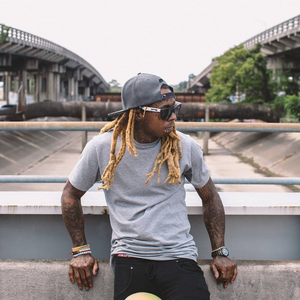

In [4]:
display_image("https://lastfm-img2.akamaized.net/i/u/300x300/0fc7d7a1812dc79e9925d80382cde594.png")

**NOW: YOUR ASSIGNMENT**

** 1) Search for and print a list of 50 musicians with `lil` in their name, along with the number of listeners they have**

There are a lot of musicians with "Lil" in their name - it used to be all Lil Wayne and Lil Kim, but we live in a new world now!

- *Tip: Remember, the domain for the API is `http://ws.audioscrobbler.com`*
- *Tip: Make sure you ask the API for 50 musicians! This involves adding another parameter to the URL - notice they all have a `&` before them. [Read the documentation](http://www.last.fm/api/show/artist.search) to find the parameter's name.* 
- *Tip: When you are looking at any piece of data - is it a dictionary? Look at the keys! Is it a list? Look at the first element!*
- *Tip: LOOK AT THE KEYS. and then the other keys and the other keys and the other keys. It's an ugly series of dictionaries!*

In [5]:
import requests
url = "http://ws.audioscrobbler.com/2.0/?method=artist.search&artist=lil&limit=50&api_key=a0ee461ed3ecab6ee302fc2414d6445b&format=json"
response = requests.get(url) 
data = response.json()

In [125]:
# print(data)

In [7]:
type(data)

dict

In [8]:
data.keys()

dict_keys(['results'])

In [126]:
# data['results']

In [10]:
artist = data["results"]
type(artist) # dictionary
artist.keys() # look up its keys

dict_keys(['opensearch:Query', 'opensearch:totalResults', 'opensearch:startIndex', 'opensearch:itemsPerPage', 'artistmatches', '@attr'])

In [11]:
name = artist['artistmatches']
type(name) # dict
name.keys()

dict_keys(['artist'])

In [12]:
artist_name = name["artist"]
type(artist_name) # it's a list!

list

In [127]:
# artist_name[0]

In [14]:
type(artist_name[0]) # dict
artist_name[0].keys()

dict_keys(['name', 'listeners', 'mbid', 'url', 'streamable', 'image'])

In [15]:
artist_name[0]["name"]

"Lil' Wayne"

In [16]:
for artist in artist_name:
    print(artist["name"], "has", artist["listeners"], "listeners.")

Lil' Wayne has 3087477 listeners.
Lily Allen has 2074821 listeners.
Lil B has 194171 listeners.
Lilly Wood & The Prick has 360199 listeners.
LIL UZI VERT has 91190 listeners.
Lil Ugly Mane has 31992 listeners.
Lil Jon has 581685 listeners.
Lil' Kim has 431506 listeners.
Lil Jon & The East Side Boyz has 486941 listeners.
Lil Yachty has 60997 listeners.
Lil Boosie has 420369 listeners.
Lila Downs has 155405 listeners.
Lil Dicky has 79209 listeners.
The Tiger Lillies has 106963 listeners.
Lil Wyte has 255215 listeners.
Birdman & Lil' Wayne has 587431 listeners.
Lil' Flip has 324577 listeners.
Lily & Madeleine has 111158 listeners.
Spangle call Lilli line has 28730 listeners.
Lil Durk has 49589 listeners.
Lillasyster has 47291 listeners.
Lilu has 35892 listeners.
Lil' Scrappy has 257909 listeners.
Lilys has 54252 listeners.
The Lillingtons has 32098 listeners.
LIL PEEP has 9116 listeners.
Leila has 52343 listeners.
Lil Mama has 150570 listeners.
Lillix has 99362 listeners.
Lily Chou-Chou h

Your results should begin something like this:
    
```
Lil' Wayne has 3086628 listeners
Lily Allen has 2074266 listeners
Lil B has 194116 listeners
Lilly Wood & The Prick has 359886 listeners
Lil Ugly Mane has 31955 listeners
LIL UZI VERT has 88517 listeners
```

** 2) How many listeners does your list have in total?**

The answer should be roughly **11,500,000**. If it's closer to **10,000,000** make sure you have 50 artists instead of 30 artists.

- *Tip: What's the data type of the `listeners` count? It's going to cause a problem!*
- *Tip: If you were crazy you could use sum and a list comprehension. But you really don't have to!*

In [17]:
count = 0
for artist in artist_name:
    count+=1
print(count)

50


In [18]:
# type(artist["listeners"]) # string

# s = raw_input()
# print sum(int(c) for c in s.strip())


total = 0
for count in artist_name:
    total = total + int(count["listeners"])
print(total)


11517416


** 3) Show each artist's name and extra-large image**

Because you ran the code in setup, you now have a function called `display_image` that you can use to display an image if you give it a URL as a string. For example, I have this image and want to display it. I just send a string URL to the `display_image` method.

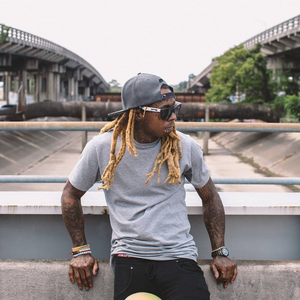

In [19]:
display_image("https://lastfm-img2.akamaized.net/i/u/300x300/0fc7d7a1812dc79e9925d80382cde594.png")

Each artist **has a list of images of different sizes**. We're interested in the second-to-last one, where `size` is `extralarge`. Print their name and use `display_image` to display their extra-large image.

- *Tip: The URL should look like this: `https://lastfm-img2.akamaized.net/i/u/300x300/0fc7d7a1812dc79e9925d80382cde594.png`*
- *Tip: You can always assume it's the second to the last, or assume it's `extralarge`, or whatever you want to do to find it.*
- *Tip: Make sure the URL is correct before you try to display it.*

Lil' Wayne


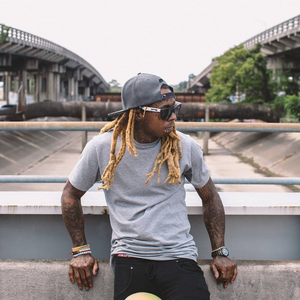

Lily Allen


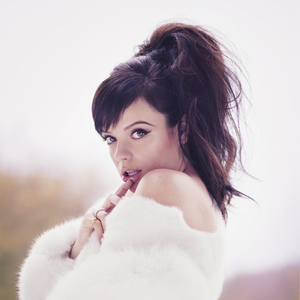

Lil B


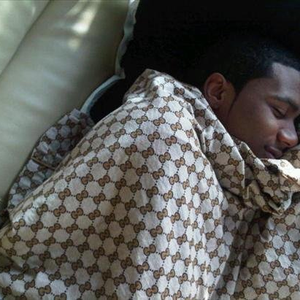

Lilly Wood & The Prick


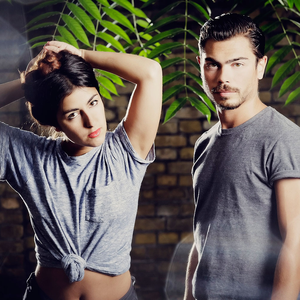

LIL UZI VERT


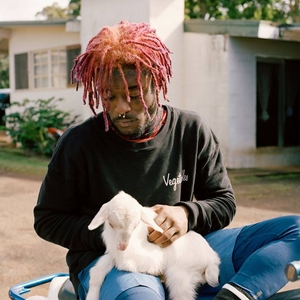

Lil Ugly Mane


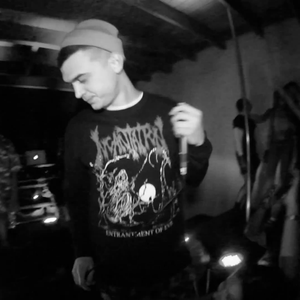

Lil Jon


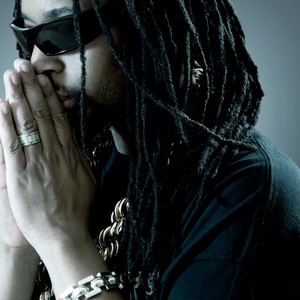

Lil' Kim


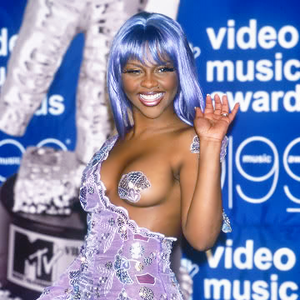

Lil Jon & The East Side Boyz


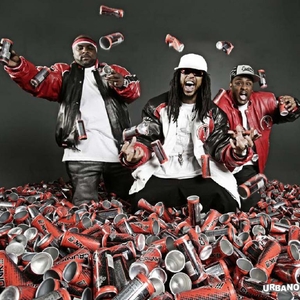

Lil Yachty


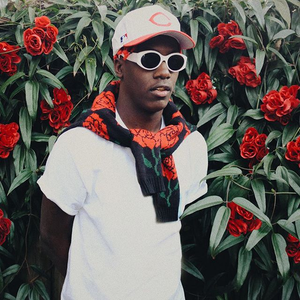

Lil Boosie


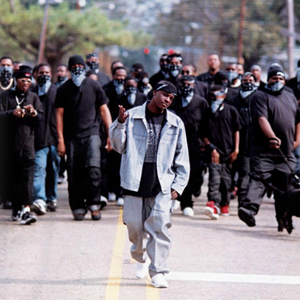

Lila Downs


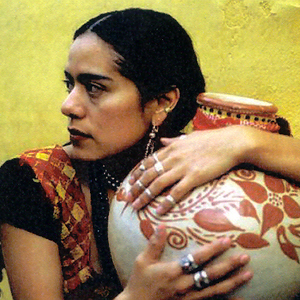

Lil Dicky


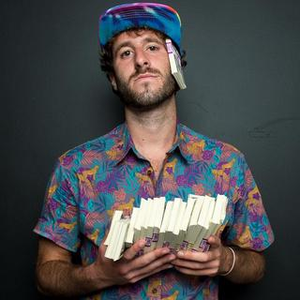

The Tiger Lillies


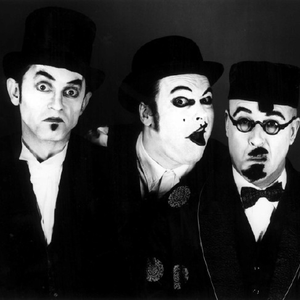

Lil Wyte


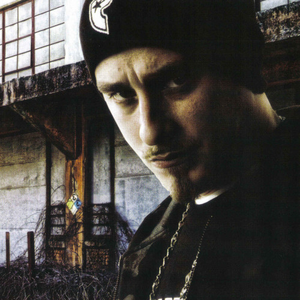

Birdman & Lil' Wayne


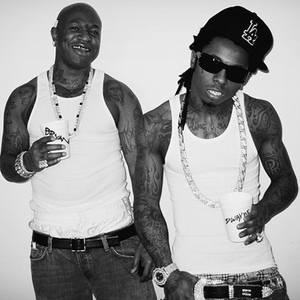

Lil' Flip


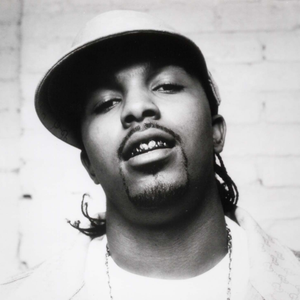

Lily & Madeleine


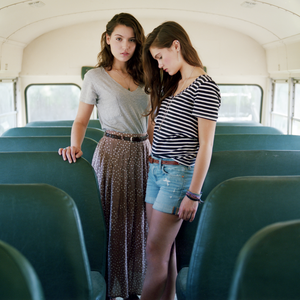

Spangle call Lilli line


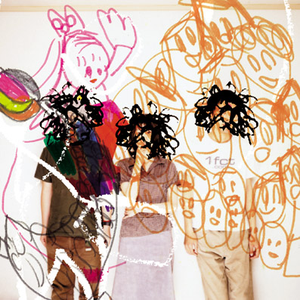

Lil Durk


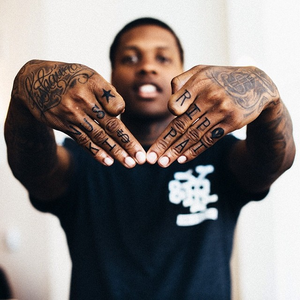

Lillasyster


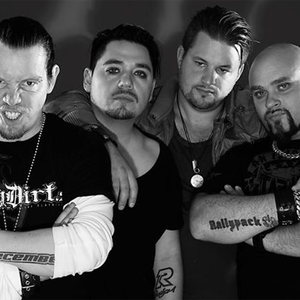

Lilu


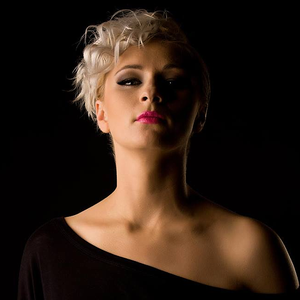

Lil' Scrappy


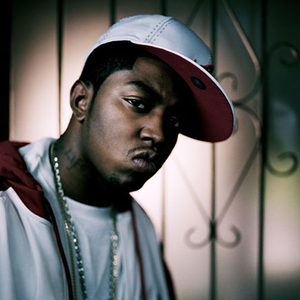

Lilys


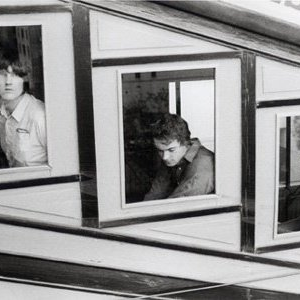

The Lillingtons


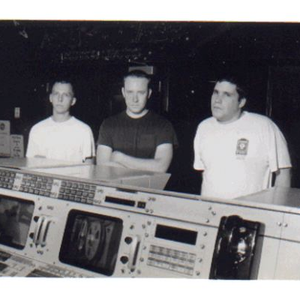

LIL PEEP


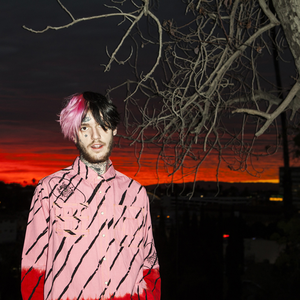

Leila


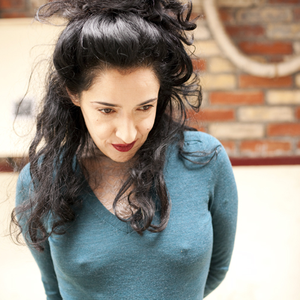

Lil Mama


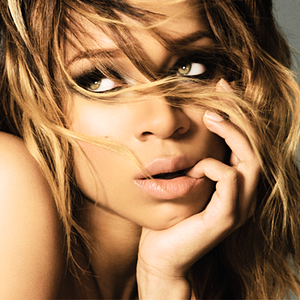

Lillix


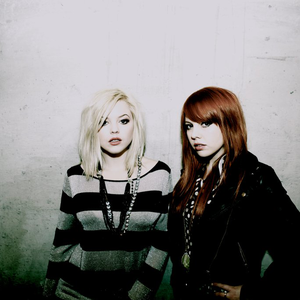

Lily Chou-Chou


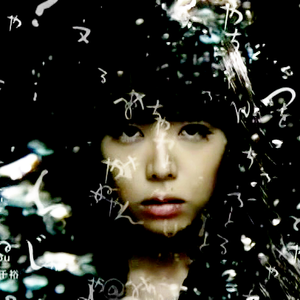

Liliput


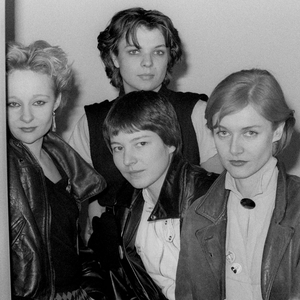

Lil' Kleine


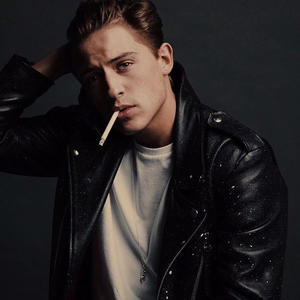

Amelia Lily


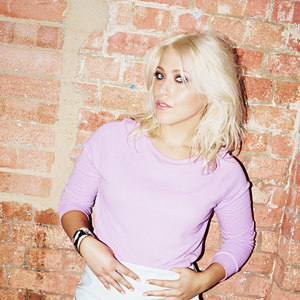

Mashrou' Leila


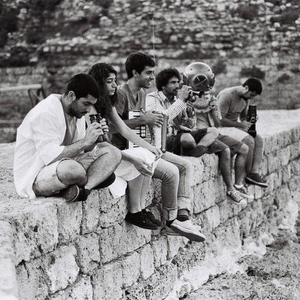

Lil Twist


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Lil Rob


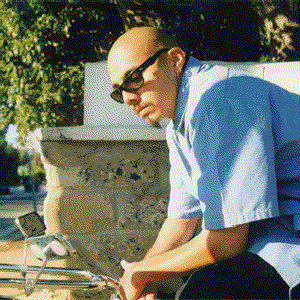

Lil Silva


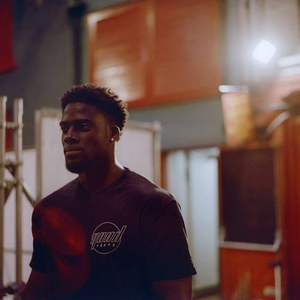

Lil Scrappy


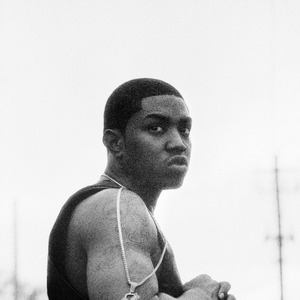

Lilium


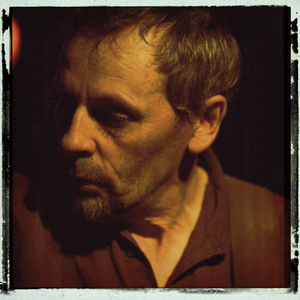

Lilacs & Champagne


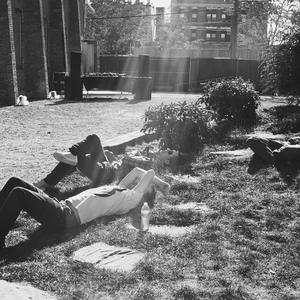

Lil Debbie


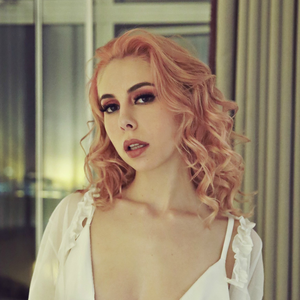

Lil Herb


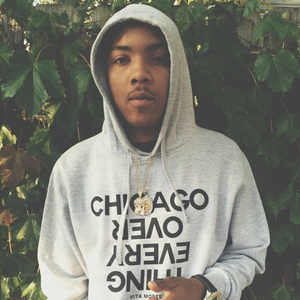

Lil' Keke


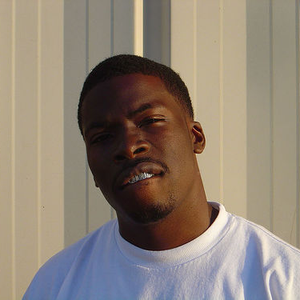

Lil Bibby


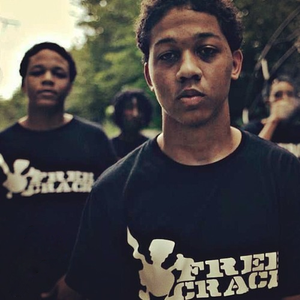

DJ Snake & Lil Jon


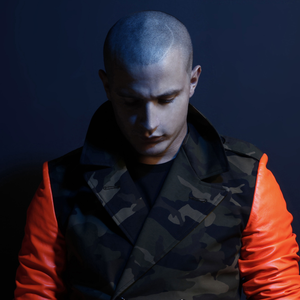

Lil Keke


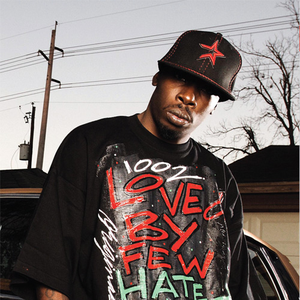

Lilly Hates Roses


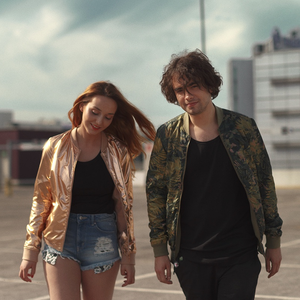

Lil' Mo


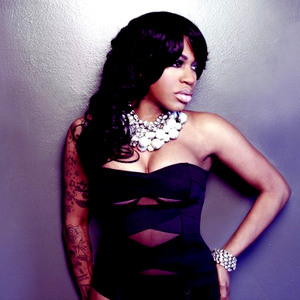

In [20]:
# 3) Show each artist's name and extra-large image

image = []
for artist in artist_name:
    print(artist["name"])
    display_image(artist["image"][3]["#text"])
           

** 4) Find Lil Jon's `mbid` (or anyone else's!).**

Oftentimes in an API, you can do a few things: you can **search** for items, and you can **see more information** about items. To find more information about the item, you need to use their **unique id**. In this dataset, it's called an `mbid` (MusicBrainz, I think - another company associated with last.fm!).

Go through the artists and print their **name and mbid**. Find Lil Jon's `mbid`. I *wanted* Lil Uzi Vert's, but for some reason it isn't there. Then I wanted us to look at Lily Allen's, but I just couldn't bring myself to do that. If you'd rather do someone else, go for it.

In [21]:
for artist in artist_name:
    if artist["name"] == "Lil Jon":
        print(artist["name"], artist["mbid"])

Lil Jon a95384b1-6aec-468c-ae0d-8c6daf87c4c2


** 5) Find the artist's name and bio using their `mbid`.**

If you look at the [last.fm documentation](http://www.last.fm/api/show/artist.getInfo), you can see how to use the artist's `mbid` to find more information about them. Print **every tag associated with your artist**.

- *Tip: It's a new request to the API*
- *Tip: Use the `mbid`, and make sure you delete the `&name=Cher` from the sample endpoint*
- *Tip: If you use `print` for the bio it looks a little nicer than it would otherwise*

In [28]:
url = "http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&mbid=a95384b1-6aec-468c-ae0d-8c6daf87c4c2&api_key=a0ee461ed3ecab6ee302fc2414d6445b&format=json"
response = requests.get(url) 
profile = response.json()

# /2.0/?method=artist.getinfo&name=lil&mbid&api_key=a0ee461ed3ecab6ee302fc2414d6445b&format=json

In [128]:
# print(profile)

In [30]:
profile.keys()

dict_keys(['artist'])

In [31]:
artist_bio = profile["artist"]["bio"]
artist_bio.keys()

dict_keys(['links', 'published', 'summary', 'content'])

In [32]:
# Print every tag associated with your artist.

print(artist["name"],":", artist_bio["summary"])


Lil' Mo : Jonathan Mortimer Smith (born January 27, 1971 in Atlanta, Georgia), better known by his stage name Lil Jon, is an American rapper, actor, producer and member of the crunk group Lil Jon & The East Side Boyz. Lil Jon formed the group with friends Big Sam and Lil Bo, and they released five studio albums and have had many hit songs. He's prehaps best known for his iconic single "Get Low", which featured the Ying Yang Twins and reached #2 on the Billboard 100. He released his debut solo album, 'Crunk Rock', in June 2010. <a href="https://www.last.fm/music/Lil+Jon">Read more on Last.fm</a>


** 6) Print every tag of that artist**


In [129]:
artist_tags = profile["artist"]["tags"]
# print(artist_tags)


In [130]:
artist_tags.keys()

dict_keys(['tag'])

In [59]:
genre = artist_tags["tag"]
print(genre)


[{'name': 'Crunk', 'url': 'https://www.last.fm/tag/Crunk'}, {'name': 'Hip-Hop', 'url': 'https://www.last.fm/tag/Hip-Hop'}, {'name': 'rap', 'url': 'https://www.last.fm/tag/rap'}, {'name': 'Dirty South', 'url': 'https://www.last.fm/tag/Dirty+South'}, {'name': 'hip hop', 'url': 'https://www.last.fm/tag/hip+hop'}]


In [61]:
for art in genre:
    print(art["name"])

Crunk
Hip-Hop
rap
Dirty South
hip hop


** GETTING A LITTLE CRAZY**

So you know your original list of musicians? I want to get tag data for ALL OF THEM. How are we going to do that?

** 7) Find the mbids (again)**

If we have a musician with an mbid of `AAA-AAA-AAA`, we get their info from a url like `http://ws.audioscrobbler.com/blahblah/?api_key=12345&mbid=AAA-AAA-AAA`.

|artist|url|
|---|---|
|`AAA-AAA-AAA`|`http://ws.audioscrobbler.com/blahblah/?api_key=12345&mbid=AAA-AAA-AAA`|
|`BBB-BBB-BBB`|`http://ws.audioscrobbler.com/blahblah/?api_key=12345&mbid=BBB-BBB-BBB`|
|`CCC-CCC-CCC`|`http://ws.audioscrobbler.com/blahblah/?api_key=12345&mbid=CCC-CCC-CCC`|

I guess we should start trying to get a list of all of the mbids.

**Loop through your artists, and print out the `mbid` for each artist**

- *Tip: You probably need to request your artist search result data again, because you probably saved over `data` with your other API request. Maybe call it `artist_data` this time?*
- *Tip: If the artist does NOT have an `mbid`, don't print it.

In [62]:
url = "http://ws.audioscrobbler.com/2.0/?method=artist.search&artist=lil&limit=50&api_key=a0ee461ed3ecab6ee302fc2414d6445b&format=json"
response = requests.get(url) 
artist_data = response.json()

In [63]:
artist_data.keys()

dict_keys(['results'])

In [64]:
data = artist_data["results"]
# print(data)
data.keys()

dict_keys(['opensearch:Query', 'opensearch:totalResults', 'opensearch:startIndex', 'opensearch:itemsPerPage', 'artistmatches', '@attr'])

In [65]:
moredata = data["artistmatches"]
moredata.keys()

dict_keys(['artist'])

In [66]:
artist_mbid = moredata["artist"]
artist_mbid[0]
artist_mbid[0].keys()

dict_keys(['name', 'listeners', 'mbid', 'url', 'streamable', 'image'])

In [131]:
artist_name = []

for artist in artist_mbid:
    artist_name.append(artist['name'])
# print(artist_name)


In [68]:
# for artist in artist_mbid:
#     print(artist["name"])

In [69]:
for artist in artist_mbid:
    if artist["mbid"] != '':
        print(artist["mbid"])

6e0c7c0e-cba5-4c2c-a652-38f71ef5785d
1550f952-c91b-40d7-9b4d-d26a259ee932
1b72331b-3a97-4981-a81c-eeee9c275d28
5f1adfe1-4d07-4141-b181-79e5d379d539
a95384b1-6aec-468c-ae0d-8c6daf87c4c2
bc1b5c95-e6d6-46b5-957a-5e8908b02c1e
243c6f61-d83b-4459-bebd-5899df0da111
8ba17cf6-bec2-4ae4-9820-b1cda47adc08
ad29ae1c-2eda-4071-9dc8-31910e7e546c
3268f062-6e76-480a-a384-e1dd2a276afb
3ad4f6ec-253f-4050-8849-ca26266edfb8
9b5ce0c1-1bc0-4ea2-a8d3-f5ee7af9eda8
981d39fc-bd00-4cc6-ac67-6410f8b89098
b89f4c50-72f5-48ce-b08c-a643b191b24f
bc21df5c-3d79-479b-b638-8ddb5ecea403
c9cd225b-4883-428e-82c2-73e0b6282fb6
9acaf734-b380-4c48-954c-a2cf1d7990a9
d4d5ae85-700c-4a55-8a39-7f923da07ef2
77fafce8-a32f-4d42-bdce-266bbf913cee
50ad1cde-1536-4268-a55f-e47a7b8280ab
9803d120-716d-45ba-9eb7-9a120813f908
b27560ea-2783-4a91-be45-9e8711917562
194e87c9-b3fe-4fbd-82a7-8c54b4dd4c76
fd90af91-ed07-4e85-8816-26c954fe5286
5652bb3e-f225-49de-9637-5aa1539b4a7c
83bae41e-e95e-4540-8dfa-2254563858dc
48e114c4-91ba-4a6a-bea7-e7f6615f1dd4
a

Your results should look something like

```
6e0c7c0e-cba5-4c2c-a652-38f71ef5785d
1550f952-c91b-40d7-9b4d-d26a259ee932
1b72331b-3a97-4981-a81c-eeee9c275d28
5f1adfe1-4d07-4141-b181-79e5d379d539
a95384b1-6aec-468c-ae0d-8c6daf87c4c2
bc1b5c95-e6d6-46b5-957a-5e8908b02c1e
243c6f61-d83b-4459-bebd-5899df0da111
```

** 8) Saving those mbids**

For those `mbid` values, instead of printing them out, save them to a new list of just mbid values. Call this list `mbids`.

- *Tip: Use `.append` to add a single element onto a list*

In [70]:
mbids = []
# for artist in artist_mbid:
#     mbids.append(artist['mbid'])
#     print(mbids)

for artist in artist_mbid:
    if artist["mbid"] != "":
        mbids.append(artist['mbid'])
# print(mbids)
print("\n".join(mbids))
         

# print(', '.join(mbids))
# print("\n".join(mbids)) Just prints the list in new line without quotes and comma. 
# Adding ',\' inside the quotes puts new quotes and comma aroud the list 

# print("',\n'".join(mbids))

6e0c7c0e-cba5-4c2c-a652-38f71ef5785d
1550f952-c91b-40d7-9b4d-d26a259ee932
1b72331b-3a97-4981-a81c-eeee9c275d28
5f1adfe1-4d07-4141-b181-79e5d379d539
a95384b1-6aec-468c-ae0d-8c6daf87c4c2
bc1b5c95-e6d6-46b5-957a-5e8908b02c1e
243c6f61-d83b-4459-bebd-5899df0da111
8ba17cf6-bec2-4ae4-9820-b1cda47adc08
ad29ae1c-2eda-4071-9dc8-31910e7e546c
3268f062-6e76-480a-a384-e1dd2a276afb
3ad4f6ec-253f-4050-8849-ca26266edfb8
9b5ce0c1-1bc0-4ea2-a8d3-f5ee7af9eda8
981d39fc-bd00-4cc6-ac67-6410f8b89098
b89f4c50-72f5-48ce-b08c-a643b191b24f
bc21df5c-3d79-479b-b638-8ddb5ecea403
c9cd225b-4883-428e-82c2-73e0b6282fb6
9acaf734-b380-4c48-954c-a2cf1d7990a9
d4d5ae85-700c-4a55-8a39-7f923da07ef2
77fafce8-a32f-4d42-bdce-266bbf913cee
50ad1cde-1536-4268-a55f-e47a7b8280ab
9803d120-716d-45ba-9eb7-9a120813f908
b27560ea-2783-4a91-be45-9e8711917562
194e87c9-b3fe-4fbd-82a7-8c54b4dd4c76
fd90af91-ed07-4e85-8816-26c954fe5286
5652bb3e-f225-49de-9637-5aa1539b4a7c
83bae41e-e95e-4540-8dfa-2254563858dc
48e114c4-91ba-4a6a-bea7-e7f6615f1dd4
a

Your results should look something like

```['6e0c7c0e-cba5-4c2c-a652-38f71ef5785d',
 '1550f952-c91b-40d7-9b4d-d26a259ee932',
 '1b72331b-3a97-4981-a81c-eeee9c275d28',
 '5f1adfe1-4d07-4141-b181-79e5d379d539',
 'a95384b1-6aec-468c-ae0d-8c6daf87c4c2',
 'bc1b5c95-e6d6-46b5-957a-5e8908b02c1e',
 '243c6f61-d83b-4459-bebd-5899df0da111',
 '8ba17cf6-bec2-4ae4-9820-b1cda47adc08',
 'ad29ae1c-2eda-4071-9dc8-31910e7e546c',
 '3268f062-6e76-480a-a384-e1dd2a276afb',
 '3ad4f6ec-253f-4050-8849-ca26266edfb8',
 '9b5ce0c1-1bc0-4ea2-a8d3-f5ee7af9eda8',
 '981d39fc-bd00-4cc6-ac67-6410f8b89098',
 'b89f4c50-72f5-48ce-b08c-a643b191b24f',
 'bc21df5c-3d79-479b-b638-8ddb5ecea403',
 'c9cd225b-4883-428e-82c2-73e0b6282fb6',
 '9acaf734-b380-4c48-954c-a2cf1d7990a9',
 'd4d5ae85-700c-4a55-8a39-7f923da07ef2',
 '77fafce8-a32f-4d42-bdce-266bbf913cee',
 '50ad1cde-1536-4268-a55f-e47a7b8280ab',
 '9803d120-716d-45ba-9eb7-9a120813f908',
 'b27560ea-2783-4a91-be45-9e8711917562',
 '194e87c9-b3fe-4fbd-82a7-8c54b4dd4c76',
 'fd90af91-ed07-4e85-8816-26c954fe5286',
 '5652bb3e-f225-49de-9637-5aa1539b4a7c']```

** 9) Printing our API urls**

To get tag data for each artist, you need to use those `mbid` values to access their artist page on the API. Loop through the mbids, displying the URL you'll need to access.

- *Tip: You don't want to use a comma when printing, because commas add spaces into your text and URLs can't have that*
- *Tip: Make sure your URL has `artist.getinfo` in it - if not, you're using the wrong endpoint.*

In [71]:
urlid = "http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=a0ee461ed3ecab6ee302fc2414d6445b&format=json&mbid="

api_url = []
for api in mbids:
    api_url.append(urlid+api)
print("\n".join(api_url))


http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=a0ee461ed3ecab6ee302fc2414d6445b&format=json&mbid=6e0c7c0e-cba5-4c2c-a652-38f71ef5785d
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=a0ee461ed3ecab6ee302fc2414d6445b&format=json&mbid=1550f952-c91b-40d7-9b4d-d26a259ee932
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=a0ee461ed3ecab6ee302fc2414d6445b&format=json&mbid=1b72331b-3a97-4981-a81c-eeee9c275d28
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=a0ee461ed3ecab6ee302fc2414d6445b&format=json&mbid=5f1adfe1-4d07-4141-b181-79e5d379d539
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=a0ee461ed3ecab6ee302fc2414d6445b&format=json&mbid=a95384b1-6aec-468c-ae0d-8c6daf87c4c2
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=a0ee461ed3ecab6ee302fc2414d6445b&format=json&mbid=bc1b5c95-e6d6-46b5-957a-5e8908b02c1e
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=a0ee461ed3ecab6ee302fc2414d644

Your results should look something like

```http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=6e0c7c0e-cba5-4c2c-a652-38f71ef5785d
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=1550f952-c91b-40d7-9b4d-d26a259ee932
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=1b72331b-3a97-4981-a81c-eeee9c275d28
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=5f1adfe1-4d07-4141-b181-79e5d379d539
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=a95384b1-6aec-468c-ae0d-8c6daf87c4c2
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=bc1b5c95-e6d6-46b5-957a-5e8908b02c1e```

** OKAY HERE IS A LITTLE INFORMATION: Using our API urls **

This time instead of just *displaying* the URL, we're going to *request and process it*. **But first I'm going to teach you something.**

When you're dealing with an API, you don't want to make a million requests, have bad code, and then need to do those million requests again. It's usually best to test your code with a few of the results first.

So, if we have a list of numbers like this:

In [ ]:
numbers = [4, 5, 6, 7]
numbers

You can actually say to Python, **give me the first two**, and it will only give you the first two.

In [ ]:
numbers[:2]

The is **very convenient** with loopng with APIs, because instead of trying to use all FIFTY artists, you can just say "hey, please try this out with 2 of them" and you don't waste time.

** 10) Using the first three `mbids`, request the API urls and print the artist's name.**

You built the URLs in the last question, now it's time to use them! Use `requests` etc to grab the URL and get out the artist's name.

- *Tip: The code is the same as last time you got an artist's name from their info page, it's just going to be inside of a loop*
- *Tip: USE `PRINT` TO SEE WHAT YOU ARE LOOKING AT!!!!!*

In [132]:
for api in api_url[5:10]:
    url = api
    response = requests.get(url) 
    api_data = response.json()
#     print(api_data["artist"]["name"])

#     print(api_data)
        
#     print(gen["name"])
#     print(api_data["artist"]["name"])

In [73]:
api_data.keys()

dict_keys(['artist'])

In [74]:
neme = api_data["artist"]
neme.keys()

dict_keys(['name', 'mbid', 'url', 'image', 'streamable', 'ontour', 'stats', 'similar', 'tags', 'bio'])

In [75]:
genre  = neme["tags"]["tag"]
print(genre)

[{'name': 'Hip-Hop', 'url': 'https://www.last.fm/tag/Hip-Hop'}, {'name': 'rap', 'url': 'https://www.last.fm/tag/rap'}, {'name': 'comedy', 'url': 'https://www.last.fm/tag/comedy'}, {'name': 'american', 'url': 'https://www.last.fm/tag/american'}, {'name': 'hip hop', 'url': 'https://www.last.fm/tag/hip+hop'}]


In [76]:
for gen in genre:
    print(gen["name"])

Hip-Hop
rap
comedy
american
hip hop


** 11) Using the first three `mbids`, request the API urls and print the artist's name and their tags**

- *Tip: The code is the same as last time you got an artist's name from their info page, it's just going to be inside of a loop*
- *Tip: It's a for loop in a for loop!*

In [88]:
for api in api_url[:3]:
    url = api
    response = requests.get(url) 
    api_data = response.json()
    print(api_data["artist"]["name"])
    for gen in genre:
# print(api_data["artist"]["name"])
        print(gen["name"])

Lily Allen
Hip-Hop
rap
comedy
american
hip hop
Lil B
Hip-Hop
rap
comedy
american
hip hop
Lilly Wood & The Prick
Hip-Hop
rap
comedy
american
hip hop


** 12) Using the first ten mbids, print the artist's name and whether they're a rapper**

Only print their name ONCE and only print whether they are hip hop or not ONCE.

- *Tip: Rap tags include hip hop, swag, crunk, rap, dirty south, and probably a bunch of other stuff! You can include as many categories as you'd like.*
- *Tip: Every time you look at a new artist, you can say they are NOT a rapper. And once you find out one of their tags is hip hop or rap, then you can note that they're a rapper. Then once you're done looking at their tags, then you can say HEY this is a rapper, or HEY this is not a rapper.*

In [133]:
# print(api_data)

In [104]:
hip_hop_true = False

for api in api_url[:9]:
    url = api
    response = requests.get(url) 
    api_data = response.json()
    for gen in genre:
#         print(gen["name"])
        if gen["name"] == 'hip hop':
            hip_hop_true = True
        else:
            hip_hop_true = False
    if hip_hop_true == True:      
        print("ARTIST:", api_data["artist"]["name"]) 
        print("YES hip hop")
    else:
        print("ARTIST:", api_data["artist"]["name"]) 
        print("NO hip hop")

ARTIST: Lily Allen
YES hip hop
ARTIST: Lil B
YES hip hop
ARTIST: Lilly Wood & The Prick
YES hip hop
ARTIST: Lil Ugly Mane
YES hip hop
ARTIST: Lil Jon
YES hip hop
ARTIST: Lil' Kim
YES hip hop
ARTIST: Lil Jon & The East Side Boyz
YES hip hop
ARTIST: Lil Boosie
YES hip hop
ARTIST: Lila Downs
YES hip hop


Your results might look something like

```ARTIST: Lily Allen
NO hip hop
ARTIST: Lil B
YES hip hop
ARTIST: Lilly Wood & The Prick
NO hip hop
ARTIST: Lil Ugly Mane
YES hip hop
ARTIST: Lil Jon
YES hip hop
ARTIST: Lil' Kim
YES hip hop
ARTIST: Lil Jon & The East Side Boyz
YES hip hop
```

** 13) What percent of "lil" results are rappers?**

In [124]:
count = 0
for api in api_url:
    url = api
    response = requests.get(url) 
    api_data = response.json()
    for gen in genre:
        if api_data["artist"]["name"] == "Lil" and gen["name"] == "rap": 
            count = count + 1
print(count*100, "%")

0 %


** 14) Seriously you are all-powerful now.**

YAY :-)